"""
# Step 1: Import Required Libraries
"""

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


"""
# Step 2: Load and Explore Dataset
"""

In [2]:
df = pd.read_csv("maternal.csv")
  # Replace with actual dataset path
display(df.head())
display(df.info())


display(df.describe())

,Age,SystolicBP,DiastolicBP,Blood glucose,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1014 non-null   int64  
 1   SystolicBP     1014 non-null   int64  
 2   DiastolicBP    1014 non-null   int64  
 3   Blood glucose  1014 non-null   float64
 4   BodyTemp       1014 non-null   float64
 5   HeartRate      1014 non-null   int64  
 6   RiskLevel      1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


None

,Age,SystolicBP,DiastolicBP,Blood glucose,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


"""
# Step 3: Preprocessing - Selecting Features and Target
"""

In [3]:
X = df.drop(columns=["RiskLevel"])  # filtering out age column
y = df["HeartRate"]

In [4]:
print(df.isnull().sum())  # Shows how many missing values each column has

# Handle missing values (if any)
if df.isnull().sum().any():
    print("Missing values detected. Handling missing values...")
    # Example: Drop rows with missing values
    df = df.dropna()
    # Alternatively, you could impute missing values:
    # df['column_name'].fillna(df['column_name'].mean(), inplace=True)
else:
    print("No missing values detected.")

Age              0
SystolicBP       0
DiastolicBP      0
Blood glucose    0
BodyTemp         0
HeartRate        0
RiskLevel        0
dtype: int64
No missing values detected.


Inspect the Data Preparation Code:

 Create and optimize a linear regression model using gradient descent using the dataset you found. Make sure you are utilizing the scikit-learn library.

SGDRegressor(random_state=42)

Make sure you plot the loss curve for test data and train data.

Compare linear regression model, decision trees, and random forest 

Linear Regression (Gradient Descent) - Test MSE: 5.403413601798332e+25
Decision Tree - Test MSE: 0.32019704433497537
Random Forest - Test MSE: 0.35412032635468066


Save the BEST-performing model based on the loss metric

Mean Squared Error (MSE): 0.32019704433497537



Training Linear Regression (GD) with RandomizedSearchCV...

Training Decision Tree with RandomizedSearchCV...

Training Random Forest with RandomizedSearchCV...


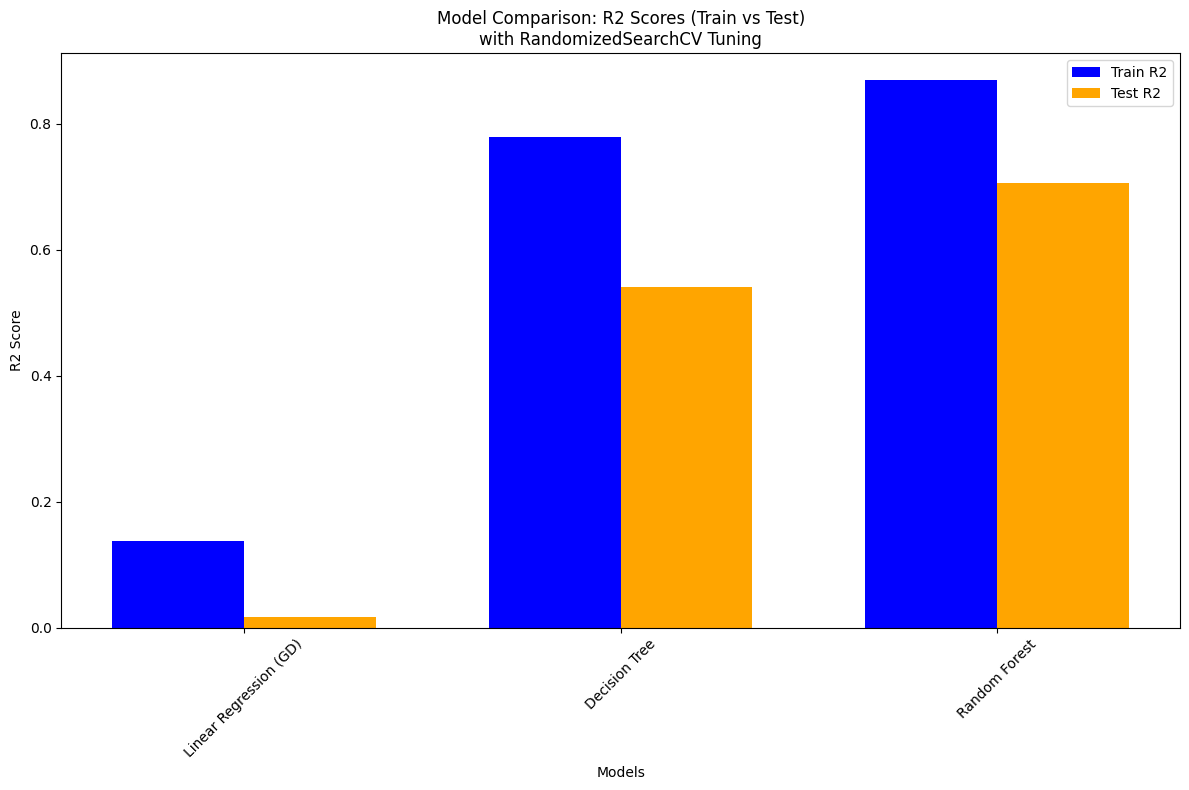

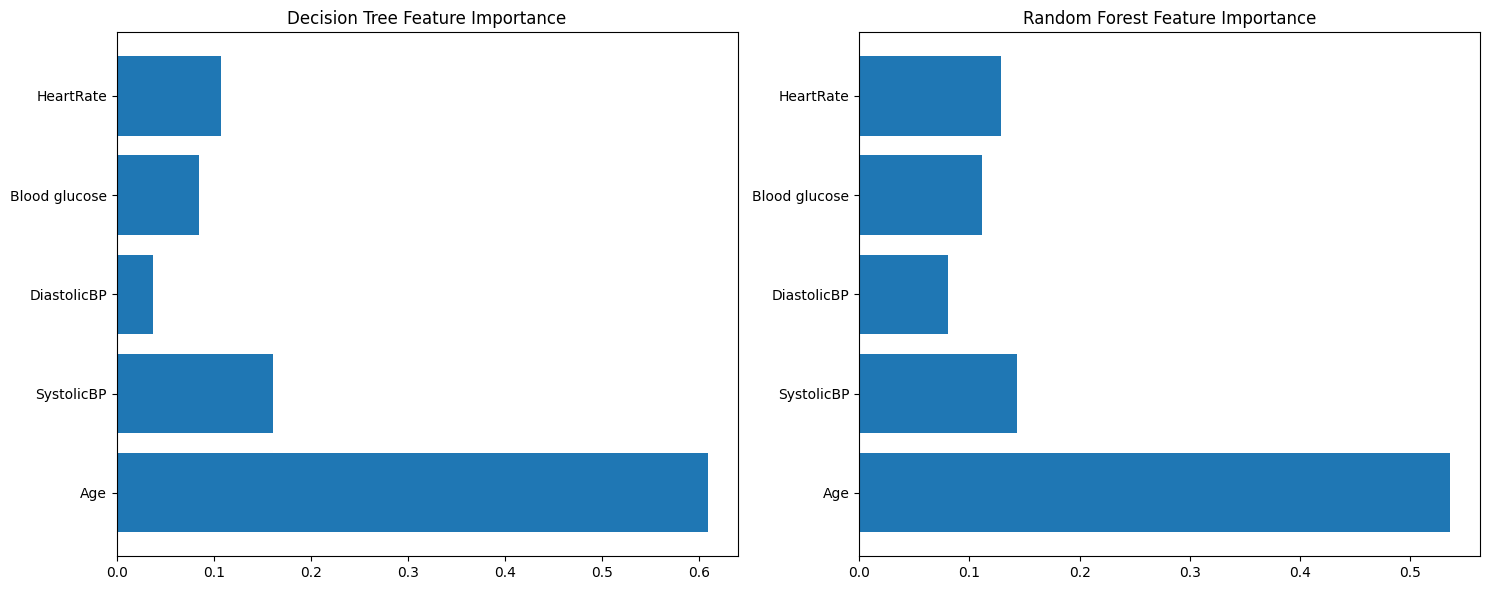

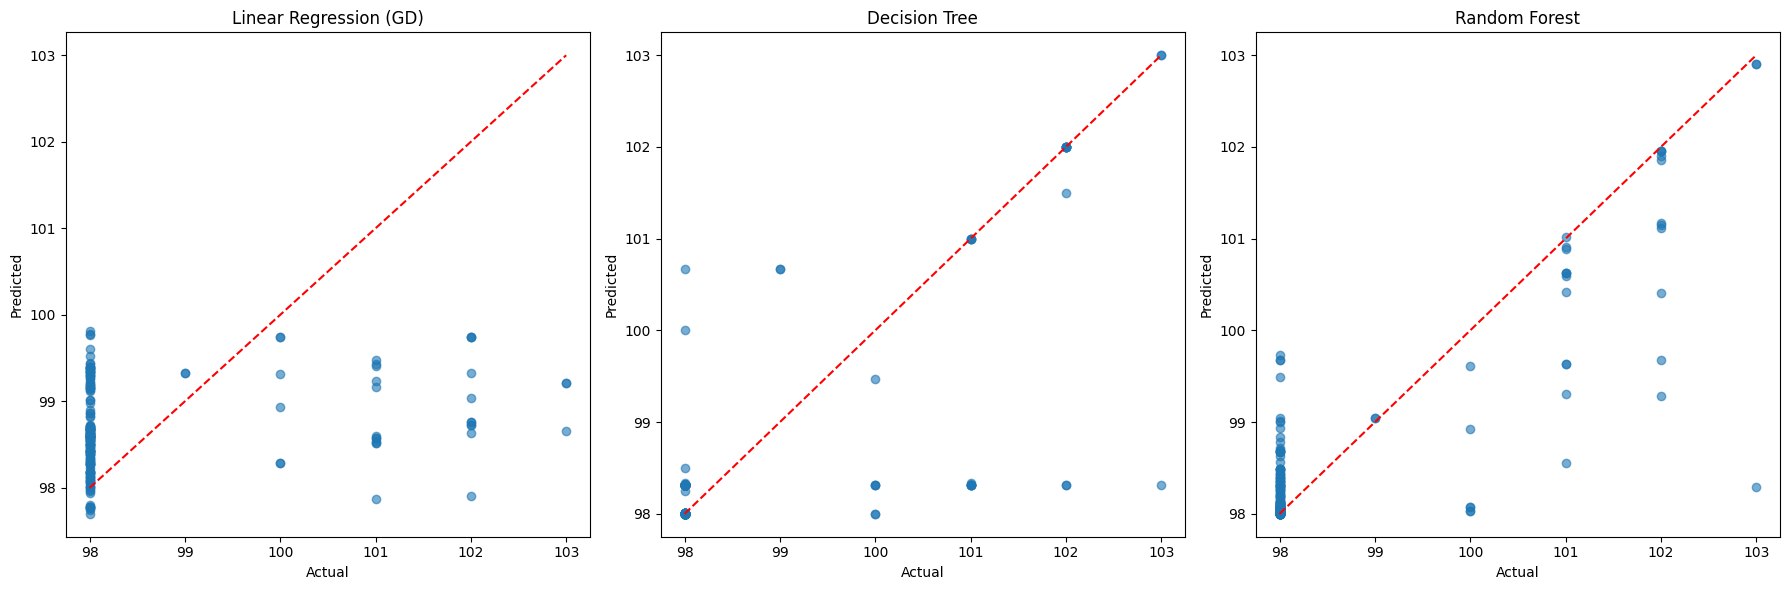

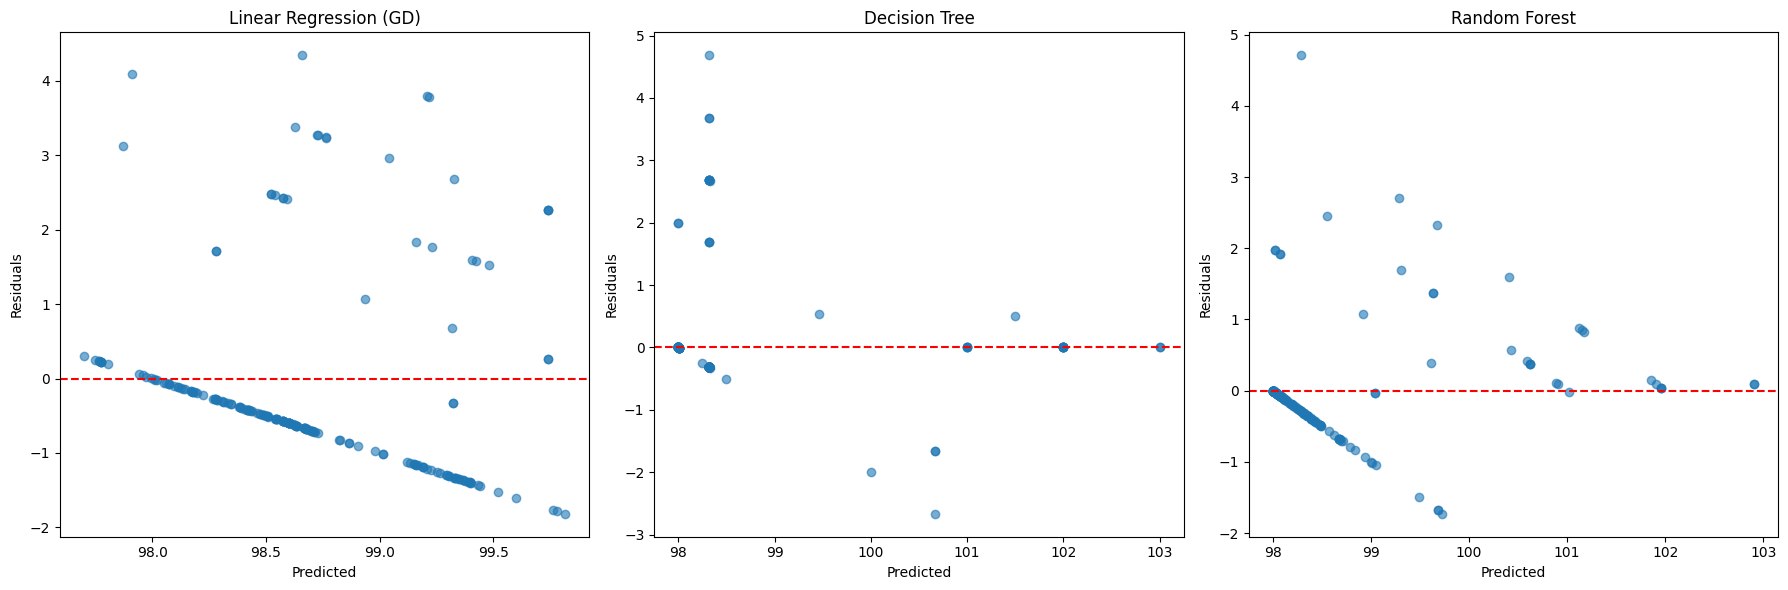


Model Performance Metrics with Best Parameters:

Linear Regression (GD):
Train R2: 0.1371 | Test R2: 0.0164
Train MSE: 1.6753 | Test MSE: 1.5819

Decision Tree:
Train R2: 0.7786 | Test R2: 0.5416
Train MSE: 0.4297 | Test MSE: 0.7372

Random Forest:
Train R2: 0.8688 | Test R2: 0.7060
Train MSE: 0.2547 | Test MSE: 0.4728


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint

# Load data
features = ['Age', 'SystolicBP', 'DiastolicBP', 'Blood glucose', 'HeartRate']
target = 'BodyTemp'
X = df[features]
y = df[target]

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and parameter distributions for RandomizedSearchCV
models = {
    "Linear Regression (GD)": {
        "model": SGDRegressor(random_state=42),
        "params": {
            'alpha': uniform(0.0001, 0.1),
            'l1_ratio': uniform(0, 1),
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'eta0': uniform(0.001, 0.1),
            'max_iter': [1000, 2000, 3000]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': randint(50, 200),
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    }
}

# Train models with RandomizedSearchCV and collect metrics
metrics = []
best_models = {}

for name, config in models.items():
    print(f"\nTraining {name} with RandomizedSearchCV...")
    
    if name == "Linear Regression (GD)":
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train
        X_te = X_test
    
    search = RandomizedSearchCV(
        config["model"],
        config["params"],
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_tr, y_train)
    
    best_models[name] = search.best_estimator_
    train_pred = search.predict(X_tr)
    test_pred = search.predict(X_te)
    
    metrics.append({
        "Model": name,
        "Train R2": r2_score(y_train, train_pred),
        "Test R2": r2_score(y_test, test_pred),
        "Train MSE": mean_squared_error(y_train, train_pred),
        "Test MSE": mean_squared_error(y_test, test_pred),
        "Best Params": search.best_params_
    })

metrics_df = pd.DataFrame(metrics)

# 1. Model Comparison (R2 Scores)
plt.figure(figsize=(12, 8))
width = 0.35
x = np.arange(len(models))
plt.bar(x - width/2, metrics_df["Train R2"], width, label='Train R2', color='blue')
plt.bar(x + width/2, metrics_df["Test R2"], width, label='Test R2', color='orange')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison: R2 Scores (Train vs Test)\nwith RandomizedSearchCV Tuning')
plt.xticks(x, metrics_df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Feature Importance Plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree
dt_model = best_models["Decision Tree"]
axes[0].barh(features, dt_model.feature_importances_)
axes[0].set_title('Decision Tree Feature Importance')

# Random Forest
rf_model = best_models["Random Forest"]
axes[1].barh(features, rf_model.feature_importances_)
axes[1].set_title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

# 3. Actual vs Predicted Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, model) in zip(axes, best_models.items()):
    if name == "Linear Regression (GD)":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    
    ax.scatter(y_test, preds, alpha=0.6)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set(xlabel='Actual', ylabel='Predicted', title=name)
    
plt.tight_layout()
plt.show()

# 4. Residual Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, model) in zip(axes, best_models.items()):
    if name == "Linear Regression (GD)":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
    
    residuals = y_test - preds
    ax.scatter(preds, residuals, alpha=0.6)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set(xlabel='Predicted', ylabel='Residuals', title=name)
    
plt.tight_layout()
plt.show()

# Print performance metrics and best parameters
print("\nModel Performance Metrics with Best Parameters:")
for _, row in metrics_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"Train R2: {row['Train R2']:.4f} | Test R2: {row['Test R2']:.4f}")
    print(f"Train MSE: {row['Train MSE']:.4f} | Test MSE: {row['Test MSE']:.4f}")

 Create a script that uses the best model to make a prediction that will be used in task

In [40]:
import joblib
import pandas as pd

# Load the best model
model = joblib.load("best_model.pkl")

# Example input for prediction
test_input = pd.DataFrame([[25,24,6.70,0.0,90]], columns=['Age', 'SystolicBP', 'DiastolicBP', 'Blood glucose', 'HeartRate'])

# Make prediction
prediction = model.predict(test_input)[0]
print(f"Predicted Body Temperature: {prediction}")

Predicted Body Temperature: 100.16966966966966


Plot feature importance for Random Forest and Decision Tree

In [ ]:
if isinstance(models["Linear Regression (Gradient Descent)"], SGDRegressor):
    sgd_model = models["Linear Regression (Gradient Descent)"]
    train_loss = []
    test_loss = []
    for epoch in range(100):
        sgd_model.partial_fit(X_train, y_train.values.ravel())  # Ensure y_train is 1D
        train_loss.append(mean_squared_error(y_train, sgd_model.predict(X_train)))
        test_loss.append(mean_squared_error(y_test, sgd_model.predict(X_test)))

    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label="Train Loss", color="blue")
    plt.plot(test_loss, label="Test Loss", color="red")
    plt.title("Loss Curve (Linear Regression - Gradient Descent)")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()